In [1]:
import sys
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, LdaModel
from wordcloud import WordCloud
from collections import defaultdict
import json
import re
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

In [2]:
########### Function to get original word from stemmed word ##########
def get_common_surface_form(original_corpus, stemmer):
    counts = defaultdict(lambda : defaultdict(int))
    surface_forms = {}

    for document in original_corpus:
        for token in document:
            stemmed = stemmer.stem(token)
            counts[stemmed][token] += 1

    for stemmed, originals in counts.items():
        surface_forms[stemmed] = max(originals, 
                                     key=lambda i: originals[i])

    return surface_forms

# function to remove emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [3]:
############## file reading and preprocessing ####################33

stemmer = PorterStemmer() # Stemmer for reducing terms to root form

stemmed_corpus = []       # For storing the stemmed tokens

original_corpus = []      # For storing the non-stemmed tokens

data_path1 = "BlackLivesMatter_InstagramPosts.json"
data_path2 = "BlackLivesMatter_InstagramComments.json"
tokenizer = RegexpTokenizer(r'\w+')

with open (data_path1, 'r', encoding = "UTF-8") as json_file:
    data_list = json.load(json_file)

with open(data_path2, 'r', encoding = "UTF-8") as json_file:
    data_list2 = json.load(json_file)

combined_data = data_list + data_list2

counter = 0
for document in combined_data:

    demoji = remove_emoji(document).lower()
    tokens = tokenizer.tokenize(demoji) #extract tokens from the text
    
    stemmed = [stemmer.stem(token) for token in tokens] #stem the tokens

    stemmed_corpus.append(stemmed) #store stemmed document

    original_corpus.append(tokens) #store original document

    counter += 1

    if counter %10000 == 0:
        print ("Posts and Comments Read:", counter)

print("Total posts and comments:", len(stemmed_corpus))
dictionary = Dictionary(stemmed_corpus) # build the dictionary

counts = get_common_surface_form(original_corpus,stemmer) # get surface form

Posts and Comments Read: 10000
Posts and Comments Read: 20000
Posts and Comments Read: 30000
Posts and Comments Read: 40000
Posts and Comments Read: 50000
Posts and Comments Read: 60000
Posts and Comments Read: 70000
Posts and Comments Read: 80000
Posts and Comments Read: 90000
Posts and Comments Read: 100000
Posts and Comments Read: 110000
Posts and Comments Read: 120000
Posts and Comments Read: 130000
Posts and Comments Read: 140000
Posts and Comments Read: 150000
Posts and Comments Read: 160000
Posts and Comments Read: 170000
Posts and Comments Read: 180000
Posts and Comments Read: 190000
Posts and Comments Read: 200000
Posts and Comments Read: 210000
Posts and Comments Read: 220000
Posts and Comments Read: 230000
Posts and Comments Read: 240000
Posts and Comments Read: 250000
Posts and Comments Read: 260000
Posts and Comments Read: 270000
Posts and Comments Read: 280000
Posts and Comments Read: 290000
Total posts and comments: 297355


In [4]:
stop_words = stopwords.words('english')
stop_words = stop_words + ["blacklivesmatter", "link", "bio", "blm", "repost", "live", "matter", "black", "lives", "need", "follow", "like", "instagram", "time", "see", "want", "make", "photo", "instagood", "explorepage", "post", "likeforlike", "music", "meme", "tiktok", "https", "explore", "photooftheday", "comment", "likeforlikes", "followforfollowback", "fashion", "one", "de", "memes", "video", "let", "still", "youtube", "artist", "art", "lol", "bro", "baby", "happy birthday", "lmao", "ok", "fucking"]

stop_words_stemmed= [stemmer.stem(token) for token in stop_words]

stemmed_corpus_filtered = []
counter = 0
for stemmed_document in stemmed_corpus:
    toAppend = []

    for token in stemmed_document:
        if token not in stop_words_stemmed:
            toAppend.append(token)
            counter += 1
    stemmed_corpus_filtered.append(toAppend)

print("Words Filtered:", counter)
print("Stop Words Filtered")

Words Filtered: 3198592
Stop Words Filtered


In [5]:
# Convert to vector corpus

vectors = [dictionary.doc2bow(text) for text in stemmed_corpus_filtered]

# Train TF-IDF model

tfidf = TfidfModel(vectors)

# Transform the corpus to tf-idf vectors

corpus_tfidf = tfidf[vectors]

# Train the LDA model

lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5)

# for pair in lda.show_topic(0,topn=1000):
#     print(pair)

# Extract 1000 terms from an arbitrarily chosen topic

print("Model Generated")


Model Generated


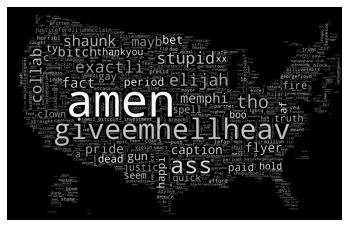

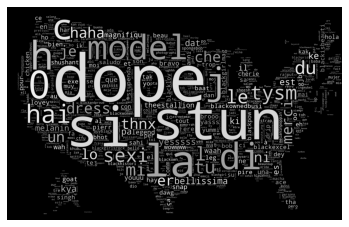

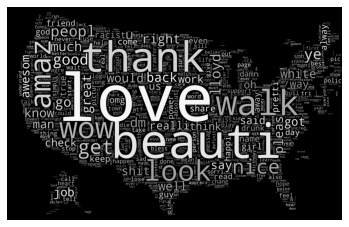

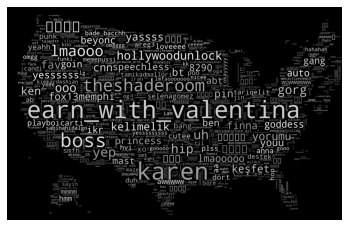

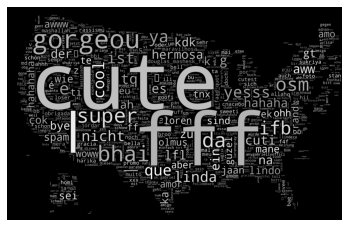

In [6]:
# To generate word cloud
# mask = np.array(Image.open("../usaMap2.jpg"))

# for i in range(5):
#     weights = [(pair[0], pair[1]) for pair in lda.show_topic(i, topn=1000)]

#     wc = WordCloud(
#         background_color="black",
#         max_words=2000,
#         width=3000,
#         height=2000,
#         mask = mask,
#         color_func=grey_color_func
#     )

#     # Generate the cloud

#     # print (dict(weights))
#     wc.generate_from_frequencies(dict(weights))

#     plt.imshow(wc)
#     plt.axis('off')
#     plt.savefig('InstagramTopicModeling'+str(i)+'.png', dpi=300)
#     plt.show()

In [34]:
########## Fill in this list to see the original words ######

# words = []

# for word in words:
#     print(counts[word])

icry
mega8wkcoj
usher
apz7cprarj
notmeus
stun
grenades
munitions
something
ricocheted
impact
filming
templ


In [6]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

In [7]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, vectors, dictionary)
out_file = "LDAModel.html"
pyLDAvis.save_html(LDAvis_prepared,out_file)